In [2]:
pip install pyspark

     |████████████████████████████████| 212.4 MB 82 kB/s 
     |████████████████████████████████| 198 kB 52.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=d85bb45d3a4c08d288f42e4d32feb97e8ba299fd2d0c5daeee5372705ad2dc2e
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
from pyspark import SparkContext
import re
import string
from pyspark import SparkConf
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sc = SparkContext("local", "program app")

In [ ]:
def topCategory():
    input = sc.textFile("/content/nytimes_news_articles.txt")
    topCategories = input.filter(lambda x: x.startswith("URL")).map(lambda x : x.split("/")[6]).map(lambda x:(x,1)).reduceByKey(lambda a,b: a+b)
    print(topCategories.take(10))
    # count_dict = stringToDictionary(topCategories.take(5))
    # wordcloud = WordCloud().generate_from_frequencies(count_dict)
    wordcloud(topCategories.take(5))
topCategory()

In [11]:
def stringToDictionary(counts):
    d = {}
    for count in counts :
        d[count[0]] = count[1]
    return d

In [14]:
def wordcloud(counts):
    d = stringtodict(counts)
    wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(d)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

In [16]:
def stringtodict(counts):
    d = {}
    for count in counts :
        d[count[0]] = count[1]
    return d

[('sports', 1268), ('nyregion', 663), ('business', 1041), ('world', 1211), ('us', 1199), ('technology', 232), ('science', 162), ('style', 32), ('your-money', 60), ('books', 85)]


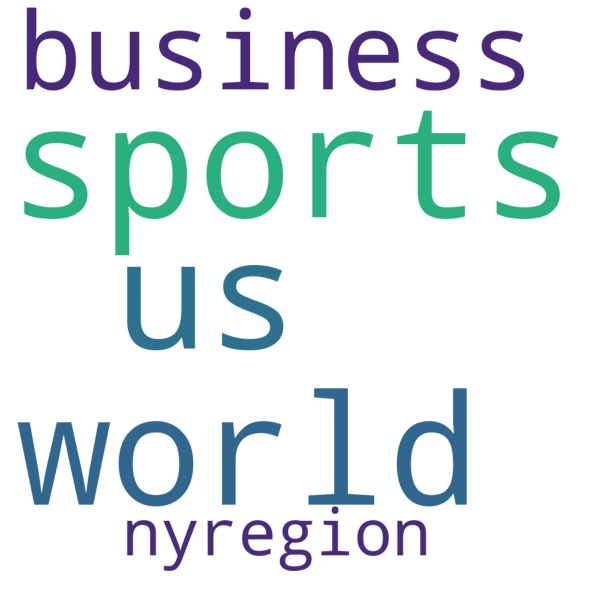

In [19]:

def topCategory():
    input = sc.textFile("/content/nytimes_news_articles.txt")
    topCategories = input.filter(lambda x: x.startswith("URL")).map(lambda x : x.split("/")[6]).map(lambda x:(x,1)).reduceByKey(lambda a,b: a+b)
    print(topCategories.take(10))
    # count_dict = stringToDictionary(topCategories.take(5))
    # wordcloud = WordCloud().generate_from_frequencies(count_dict)
    wordcloud(topCategories.take(5))
topCategory()